<a href="https://colab.research.google.com/github/Nnnnishimura/magari/blob/main/magari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow
import glob
import math

In [2]:
# download, decompress the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


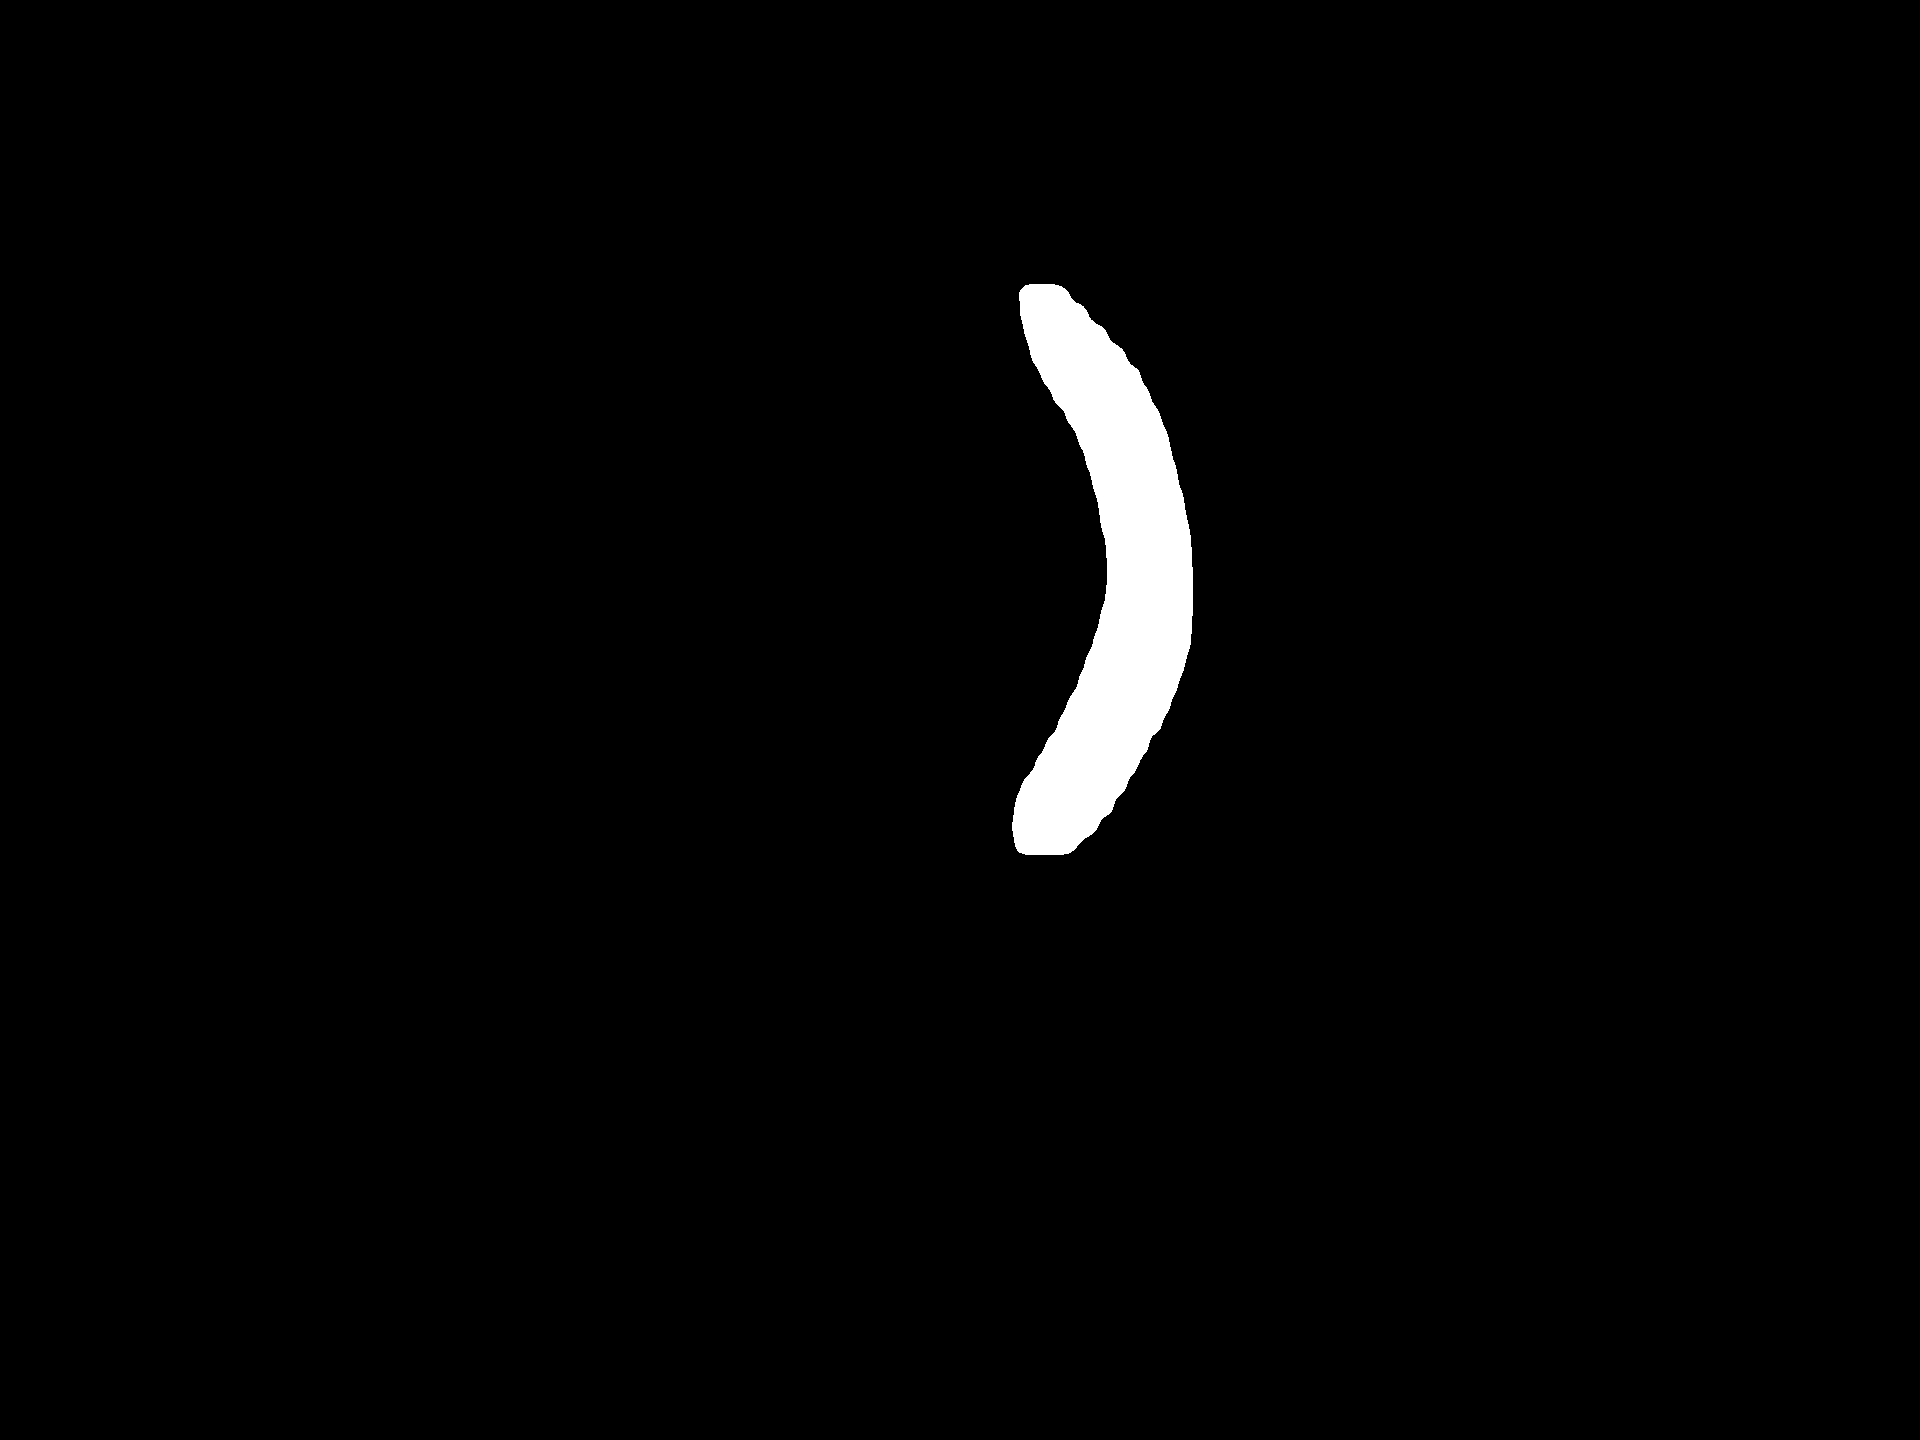

In [3]:
#画像の2値化
im = cv2.imread("/content/drive/MyDrive/79.png")
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,imthresh = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
im_copy = imthresh.copy()
cv2_imshow(im_copy)

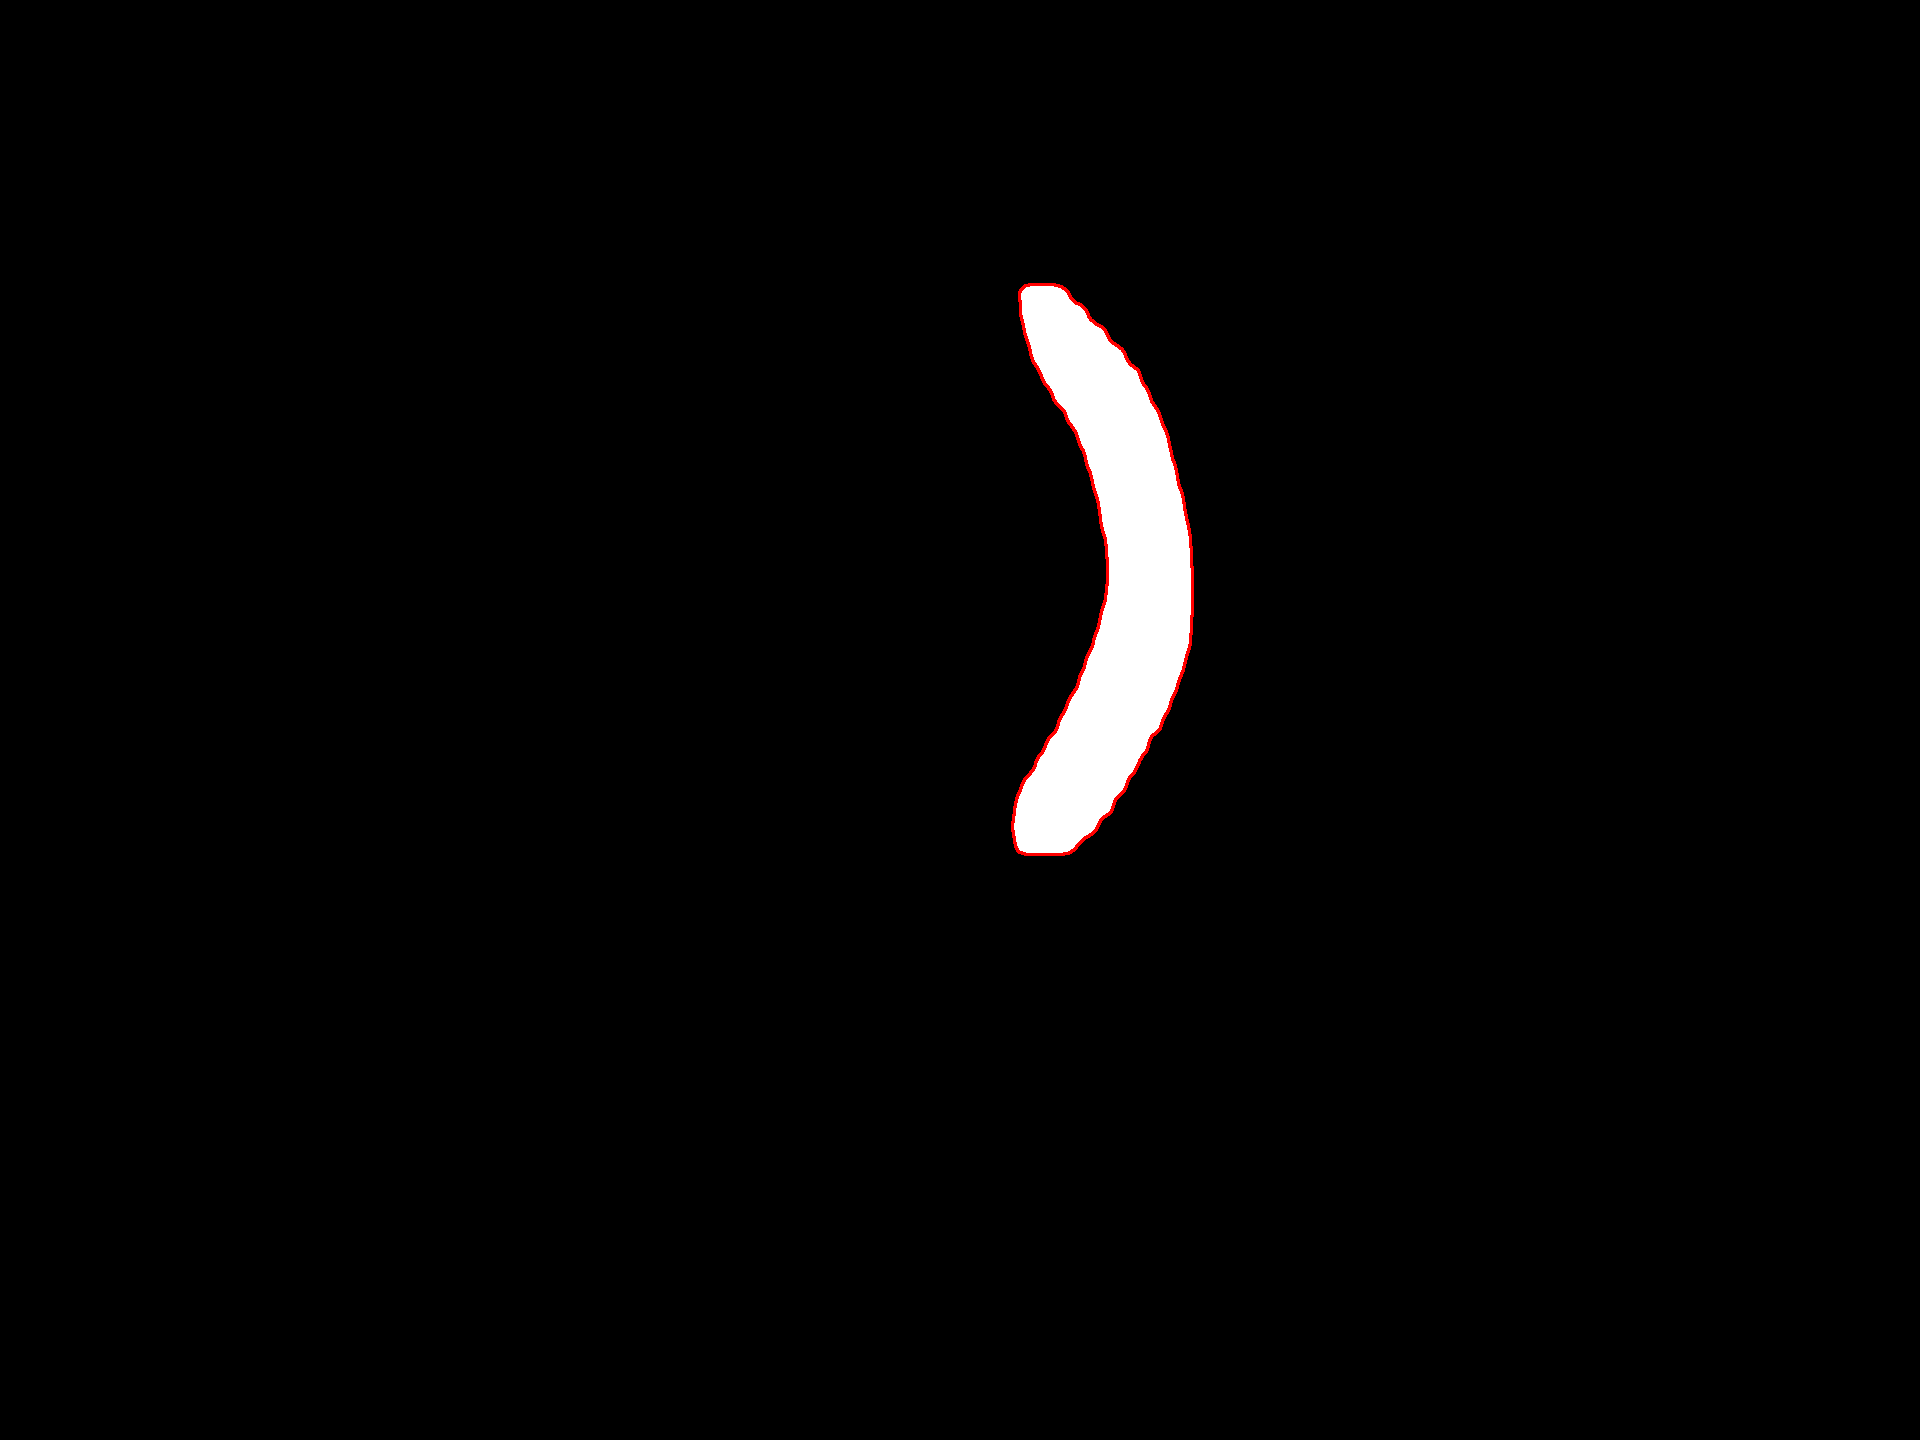

In [4]:
#大根の輪郭抽出
contours , hierarchy = cv2.findContours(im_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#輪郭抽出ができているかの確認
imrgb = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
cv2.drawContours(imrgb, contours, -1, color=(0, 0, 255), thickness=2)
cv2_imshow(imrgb)

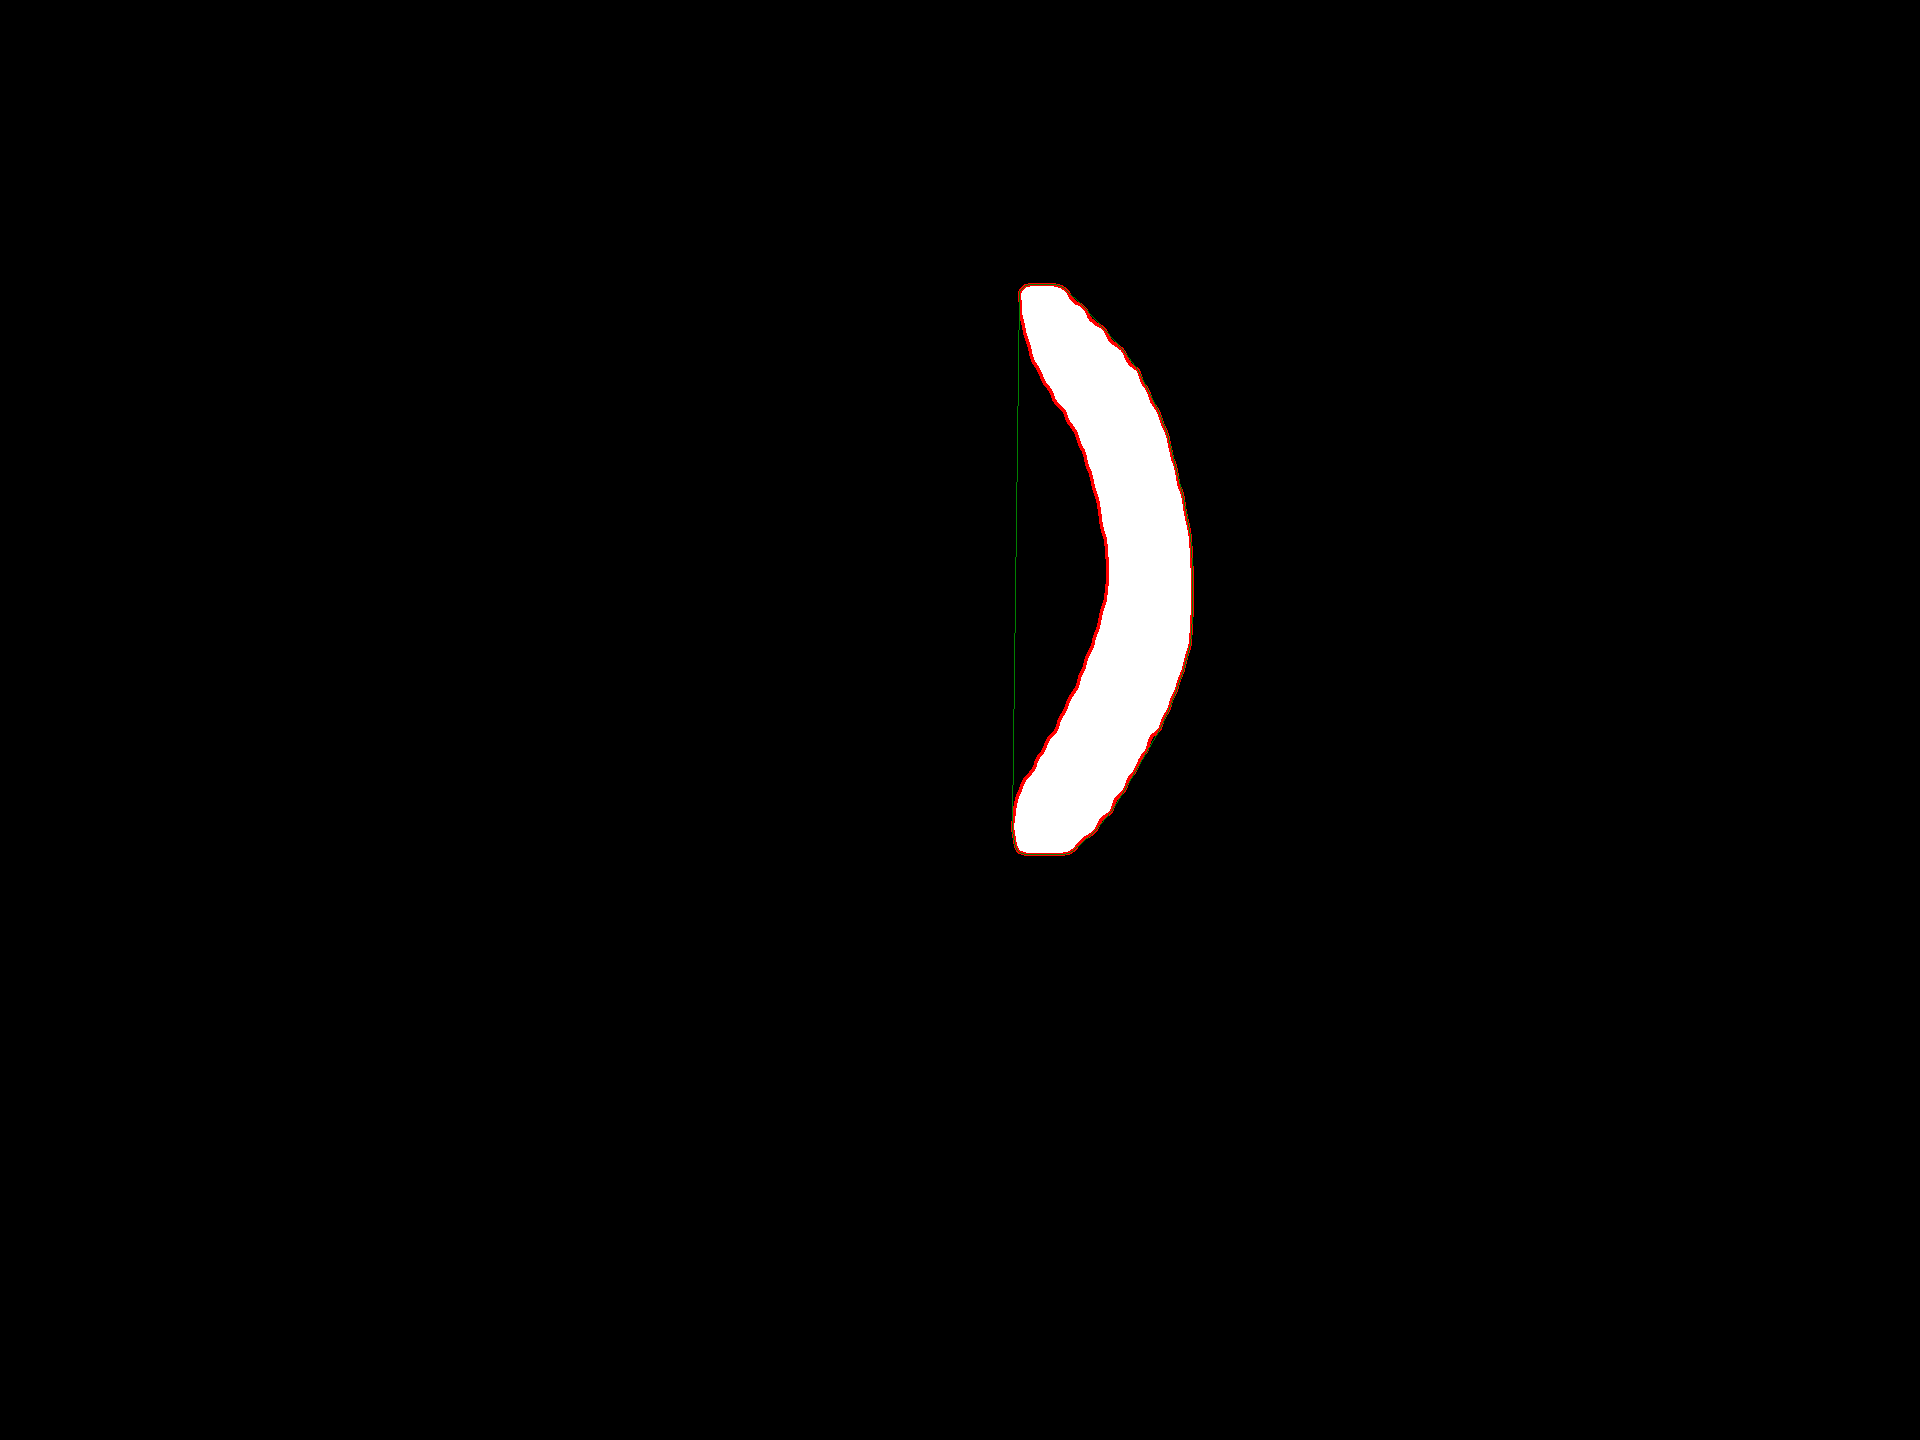

In [5]:
#凸包の作成
hull=[cv2.convexHull(c) for c in contours]
final=cv2.drawContours(imrgb,hull,-1,(0,128,0))
cv2_imshow(final)


In [6]:
#凸包を形成する点群の座標リストの作成
hull = cv2.convexHull(contours[0])
hull_pts = np.array(hull)
print(hull_pts.shape)                                         #この時のhull_ptsは3次元配列。（奥行き、行数、列数）
hull_pts = hull_pts.reshape(hull.shape[0],hull.shape[2])      #hull_ptsを3次元配列から2次元配列に変換。（行数44、列数2）
print(hull_pts)

(44, 1, 2)
[[1054  284]
 [1058  285]
 [1061  286]
 [1064  288]
 [1083  306]
 [1105  330]
 [1122  349]
 [1138  370]
 [1139  372]
 [1159  413]
 [1166  431]
 [1168  437]
 [1183  497]
 [1189  529]
 [1190  535]
 [1191  547]
 [1192  567]
 [1192  615]
 [1191  633]
 [1190  644]
 [1189  648]
 [1183  670]
 [1176  690]
 [1169  708]
 [1160  728]
 [1124  790]
 [1111  811]
 [1096  829]
 [1091  834]
 [1073  850]
 [1070  852]
 [1068  853]
 [1063  854]
 [1025  854]
 [1019  852]
 [1017  850]
 [1015  846]
 [1014  842]
 [1012  830]
 [1012  822]
 [1019  292]
 [1020  290]
 [1025  285]
 [1029  284]]


In [7]:
cv2.convexHull(contours[0]).shape

(44, 1, 2)

In [8]:
#接線の導出
previous=[]                 #空のリストを作成
max_hull_dis=0              #max_hull_dis=その時点での最大の距離(接線の候補)
for hull_pt in hull_pts:    #座標リストのインデックスを順番にhull_ptに代入
  if previous == []:        #座標リスト１つ目のインデックス[1054,284]を代入
    previous=hull_pt        #previous=[1054,284]
    initial=hull_pt         #initial=[1054,284]

  else:   #座標リストの２つ目以降のインデックス
    dis = (hull_pt[0]-previous[0])**2 + (hull_pt[1]-previous[1])**2  #１つ前の座標との距離を計算
    if dis > max_hull_dis:                                           #今までで一番長い距離と比較して上回ったら
      max_hull_dis = dis                                             #その距離をmax_hull_disに登録
      line_pt1=previous                                              #接線候補を形成する１つ目の点の座標
      line_pt2=hull_pt                                               #接線候補を形成する２つ目の点の座標
    previous = hull_pt                                               #previousを現座標に置き換え

dis = (previous[0]-initial[0])**2 + (previous[1]-initial[1])**2      #座標リストの最初と最後の点の距離を計算
if dis > max_hull_dis:                                              
  line_pt1=previous
  line_pt2=initial

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


In [9]:
print(line_pt1)     #接線を形成する１つ目の点の座標
print(line_pt2)     #接線を形成する２つ目の点の座標

[1012  822]
[1019  292]


In [10]:
#大根の輪郭を形成する点群のリスト作成

contour_pts = np.array(contours)      
print(contour_pts.shape)              #この時のcontour_ptsは4次元配列。
contour_pts = contour_pts.reshape(contour_pts.shape[1] , contour_pts.shape[3])
np.set_printoptions(threshold=np.inf) #出力結果を省略せずに表示
print(contour_pts)

(1, 619, 1, 2)
[[1029  284]
 [1028  285]
 [1025  285]
 [1020  290]
 [1020  291]
 [1019  292]
 [1019  300]
 [1020  301]
 [1020  315]
 [1021  316]
 [1021  319]
 [1022  320]
 [1022  323]
 [1023  324]
 [1023  328]
 [1024  329]
 [1024  333]
 [1025  334]
 [1025  336]
 [1026  337]
 [1026  339]
 [1027  340]
 [1027  342]
 [1028  343]
 [1028  345]
 [1029  346]
 [1029  349]
 [1030  350]
 [1030  354]
 [1031  355]
 [1031  357]
 [1032  358]
 [1032  360]
 [1033  361]
 [1033  362]
 [1035  364]
 [1035  365]
 [1037  367]
 [1037  368]
 [1038  369]
 [1038  370]
 [1039  371]
 [1039  372]
 [1040  373]
 [1040  374]
 [1041  375]
 [1041  377]
 [1042  378]
 [1042  379]
 [1043  380]
 [1043  381]
 [1044  382]
 [1044  383]
 [1048  387]
 [1048  388]
 [1050  390]
 [1050  391]
 [1051  392]
 [1051  393]
 [1052  394]
 [1052  396]
 [1053  397]
 [1053  399]
 [1055  401]
 [1055  402]
 [1064  411]
 [1064  412]
 [1065  413]
 [1065  415]
 [1066  416]
 [1066  418]
 [1067  419]
 [1067  420]
 [1068  421]
 [1068  422]
 [1071  42

In [11]:
np.array(contours).shape

(1, 619, 1, 2)

In [12]:
#内側輪郭を形成する点群のリスト作成

for  index, contour_pt  in enumerate(contour_pts):  #index = リストの番号　contour_pt = 実際の座標
  if np.all(contour_pt == line_pt2):
    index_2 = index                                 #index_2 = line_pt2のリストの番号(インデックス)
  elif np.all(contour_pt == line_pt1):
    index_1 = index                                 #index_1 = line_pt1のリストの番号(インデックス)

inside_pts = contour_pts[index_2 :index_1 + 1]      #inside_pts = 内側輪郭を形成する点群のリスト

In [13]:
print(inside_pts)

[[1019  292]
 [1019  300]
 [1020  301]
 [1020  315]
 [1021  316]
 [1021  319]
 [1022  320]
 [1022  323]
 [1023  324]
 [1023  328]
 [1024  329]
 [1024  333]
 [1025  334]
 [1025  336]
 [1026  337]
 [1026  339]
 [1027  340]
 [1027  342]
 [1028  343]
 [1028  345]
 [1029  346]
 [1029  349]
 [1030  350]
 [1030  354]
 [1031  355]
 [1031  357]
 [1032  358]
 [1032  360]
 [1033  361]
 [1033  362]
 [1035  364]
 [1035  365]
 [1037  367]
 [1037  368]
 [1038  369]
 [1038  370]
 [1039  371]
 [1039  372]
 [1040  373]
 [1040  374]
 [1041  375]
 [1041  377]
 [1042  378]
 [1042  379]
 [1043  380]
 [1043  381]
 [1044  382]
 [1044  383]
 [1048  387]
 [1048  388]
 [1050  390]
 [1050  391]
 [1051  392]
 [1051  393]
 [1052  394]
 [1052  396]
 [1053  397]
 [1053  399]
 [1055  401]
 [1055  402]
 [1064  411]
 [1064  412]
 [1065  413]
 [1065  415]
 [1066  416]
 [1066  418]
 [1067  419]
 [1067  420]
 [1068  421]
 [1068  422]
 [1071  425]
 [1071  426]
 [1073  428]
 [1073  429]
 [1075  431]
 [1075  432]
 [1076  433]

In [14]:
print(im.shape)   #im = カラー画像　　1440*1920 RGB

(1440, 1920, 3)


In [15]:
inside_buffer = np.zeros(im.shape[:2], dtype=np.uint8)   #行数1440、列数1920で数値がすべて0の2次元配列を作成
print(inside_pts.shape)                                  #この時のinside_ptsは行数287、列数２の2次元配列
inside_pts = np.reshape(inside_pts , (inside_pts.shape[0], 1, inside_pts.shape[1]))    #inside_ptsを奥行き287、行数１，列数２の３次元配列に変換
print(inside_pts)


(287, 2)
[[[1019  292]]

 [[1019  300]]

 [[1020  301]]

 [[1020  315]]

 [[1021  316]]

 [[1021  319]]

 [[1022  320]]

 [[1022  323]]

 [[1023  324]]

 [[1023  328]]

 [[1024  329]]

 [[1024  333]]

 [[1025  334]]

 [[1025  336]]

 [[1026  337]]

 [[1026  339]]

 [[1027  340]]

 [[1027  342]]

 [[1028  343]]

 [[1028  345]]

 [[1029  346]]

 [[1029  349]]

 [[1030  350]]

 [[1030  354]]

 [[1031  355]]

 [[1031  357]]

 [[1032  358]]

 [[1032  360]]

 [[1033  361]]

 [[1033  362]]

 [[1035  364]]

 [[1035  365]]

 [[1037  367]]

 [[1037  368]]

 [[1038  369]]

 [[1038  370]]

 [[1039  371]]

 [[1039  372]]

 [[1040  373]]

 [[1040  374]]

 [[1041  375]]

 [[1041  377]]

 [[1042  378]]

 [[1042  379]]

 [[1043  380]]

 [[1043  381]]

 [[1044  382]]

 [[1044  383]]

 [[1048  387]]

 [[1048  388]]

 [[1050  390]]

 [[1050  391]]

 [[1051  392]]

 [[1051  393]]

 [[1052  394]]

 [[1052  396]]

 [[1053  397]]

 [[1053  399]]

 [[1055  401]]

 [[1055  402]]

 [[1064  411]]

 [[1064  412]]


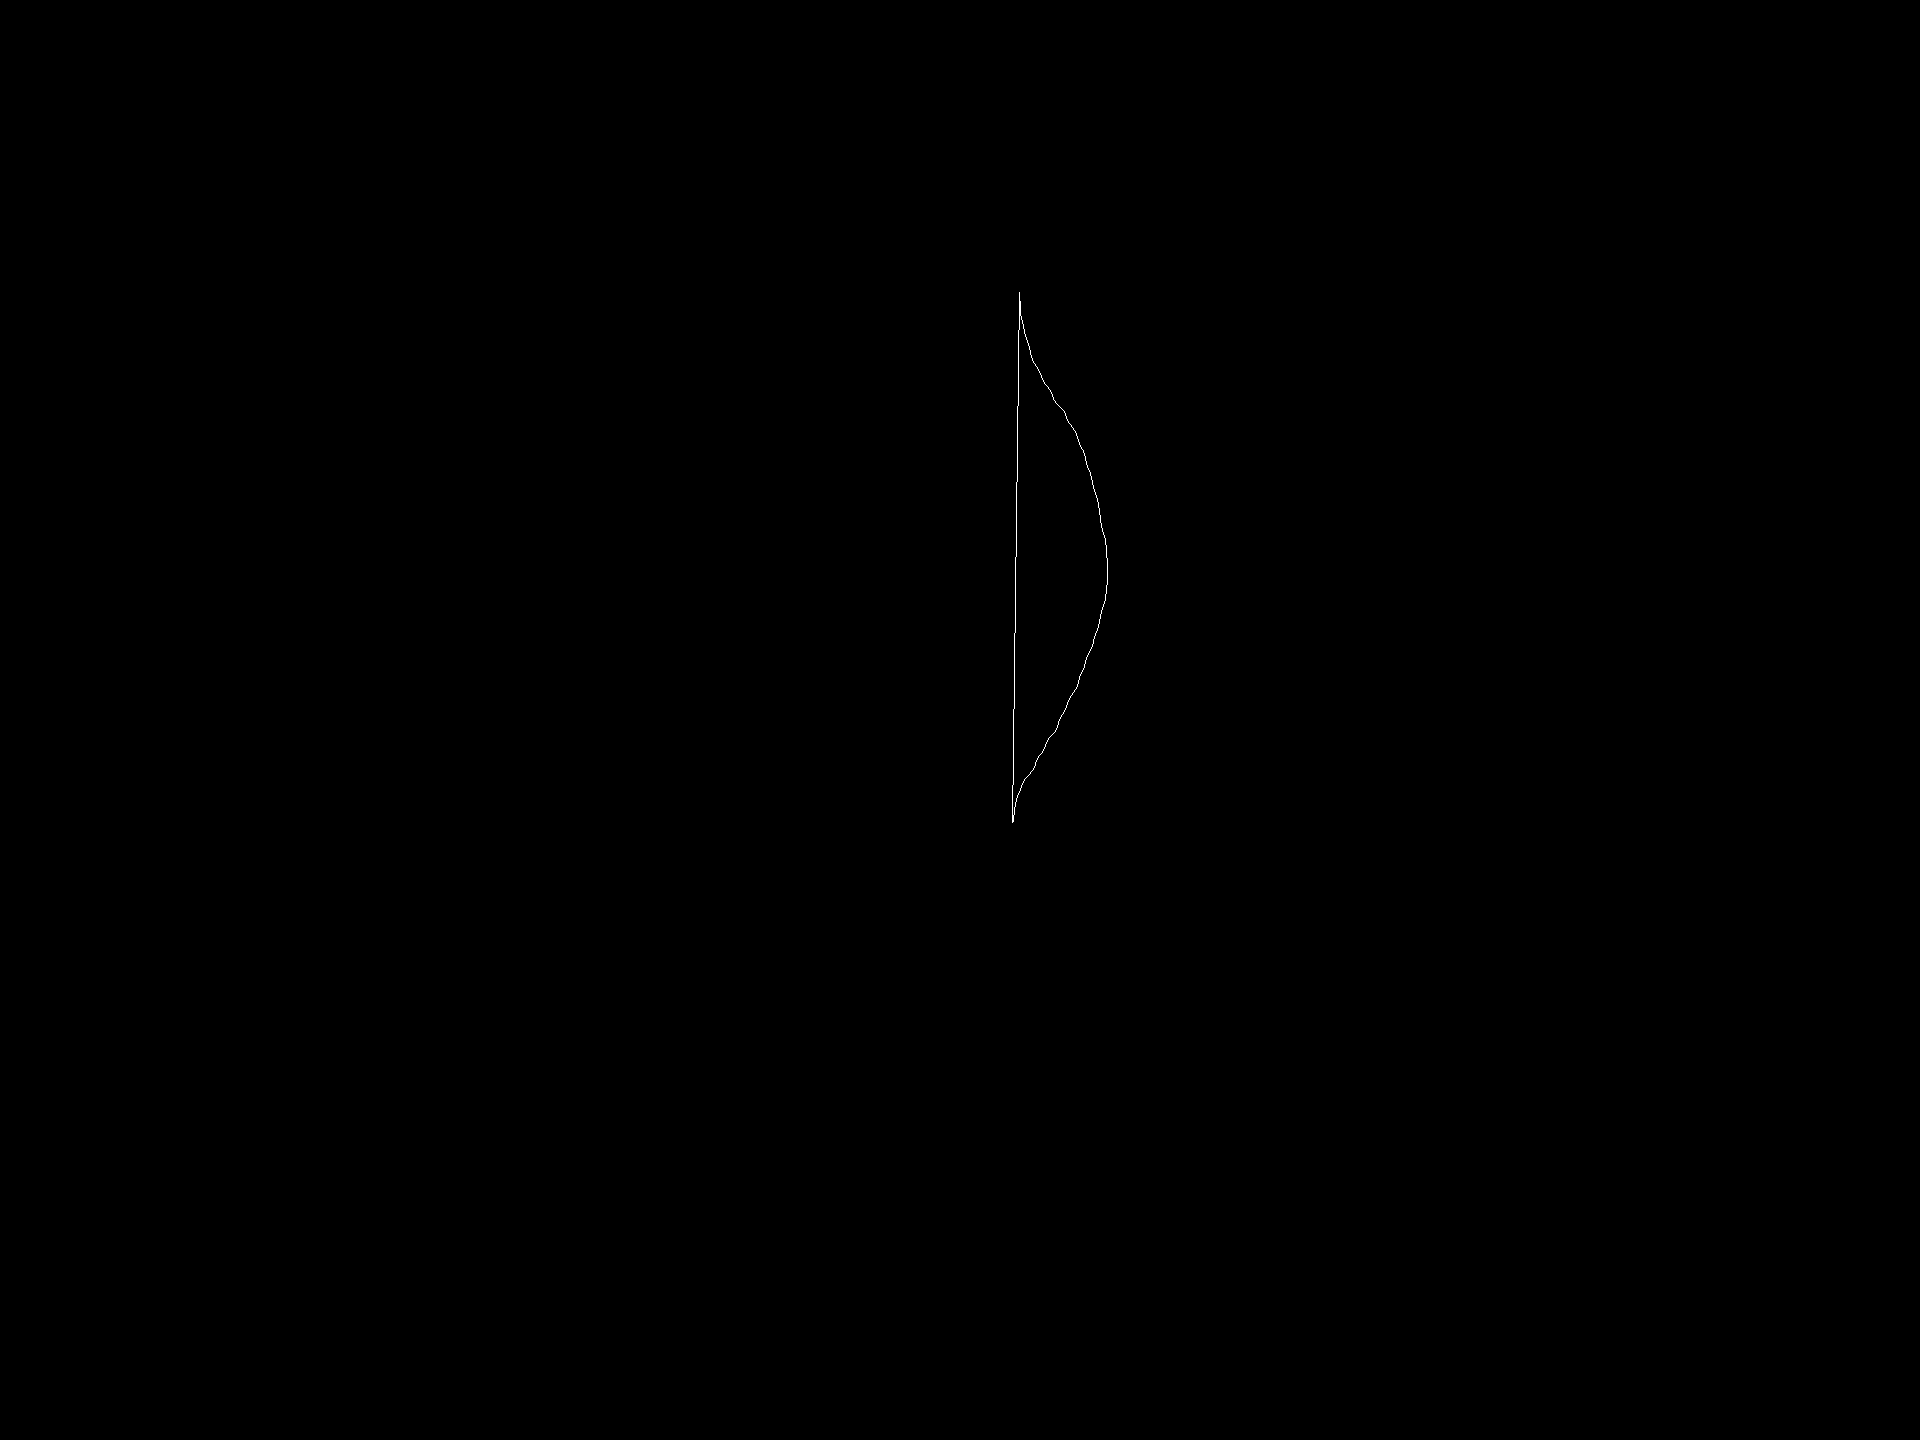

In [16]:
inside_output = cv2.polylines(inside_buffer, [inside_pts], True, 255, 1)   #第1引数：画像　第2引数：点群の座標　第3引数：True＝終点と始点を結ぶ　第4引数：線の色　第5引数：線の太さ
cv2_imshow(inside_output)                                                  #画像はグレー画像：2次元配列

In [17]:
#line_pt1のX座標、Y座標のデータ型をそれぞれnumpy.int64からintに変換
line_pt10=line_pt1[0].item()
line_pt11=line_pt1[1].item()

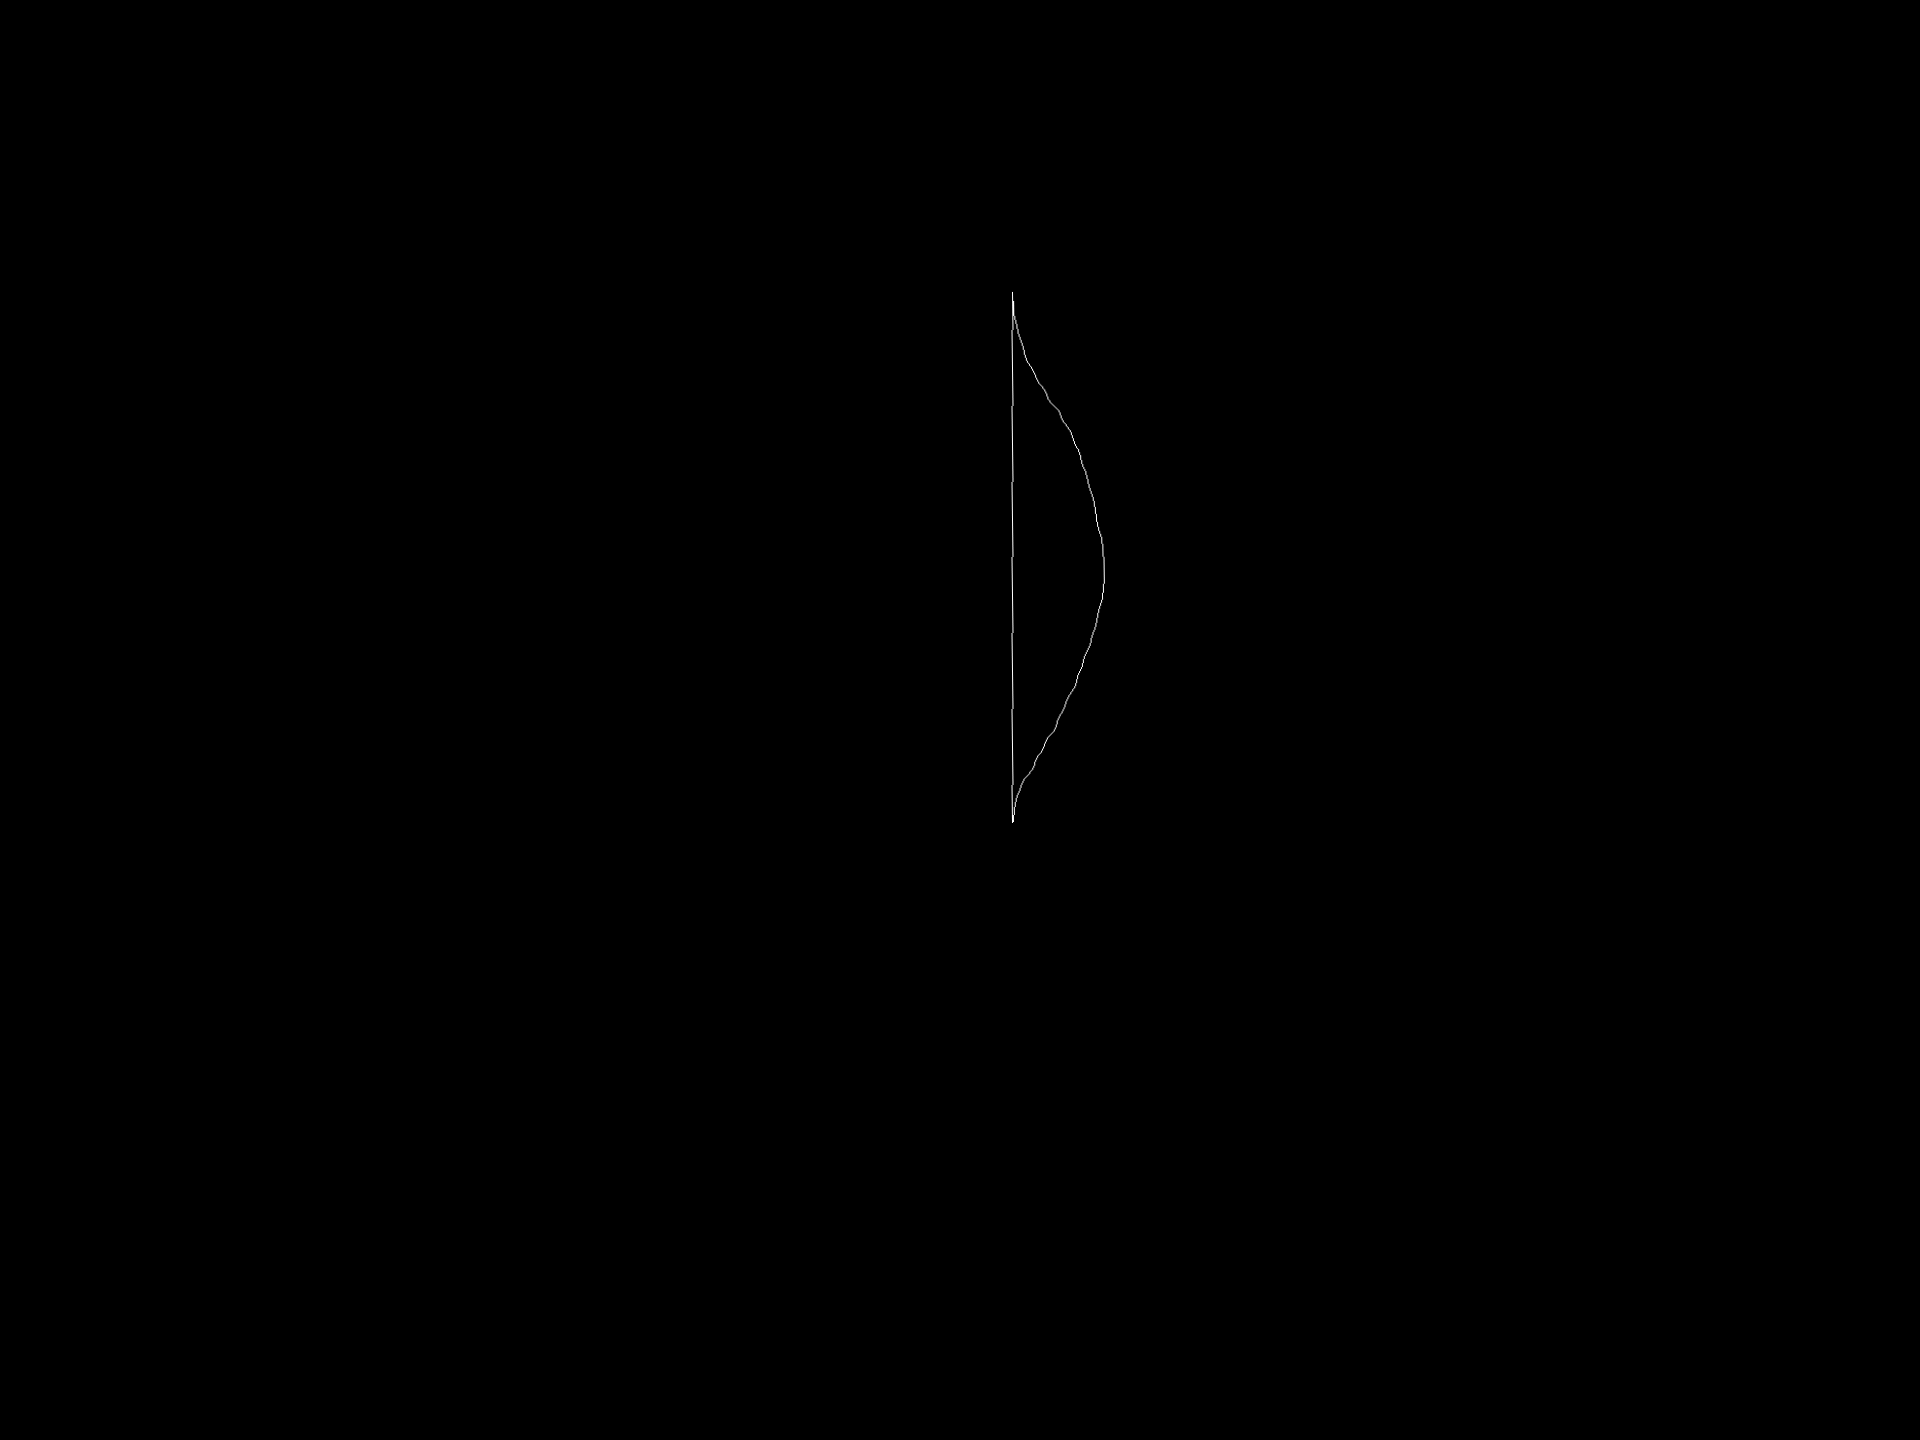

In [18]:
#画像の回転
if line_pt1[0] != line_pt2[0]:                                        #line_pt1[0],line_pt[0] = 接線の両端のX座標
  slope = -(line_pt1[1] - line_pt2[1])/(line_pt1[0] - line_pt2[0])    #接線の傾きにマイナスをつける　　左上が原点となるため
  theta = math.degrees(math.atan(slope))                              #math.atan() : tanの逆関数を得る　math.degrees() : ラジアンを度数に変換する
  if theta < 0:
    yaw = -90 - theta
  else:
    yaw = 90 - theta                                                  #yaw =　回転させる角度
  mat = cv2.getRotationMatrix2D((line_pt10,line_pt11),yaw,1)          #回転の変換行列を作成　 第1引数：回転の原点座標　第2引数：回転角度　第3引数：拡大・縮小倍率　　　　
  affine_output = cv2.warpAffine(inside_output,mat,(1920,1440))       #画像の回転(アフィン変換)　第1引数：元画像　第2引数：変換行列　第3引数：出力画像のサイズ
cv2_imshow(affine_output)


In [19]:
dis_pts = list(zip(*np.where(affine_output >= 1))) #np.where(affine_output >= 1) : 画像内で色が1以上（=白線）の座標の高さ(Y座標)と幅(X座標)をそれぞれリストにして作成
print(dis_pts)                                     #zip(*np.where(affine_output >= 1) : 上の高さと幅の座標リストをインデックス順に組み合わせて座標リストを作成(タプル)

[(291, 1012), (292, 1012), (293, 1012), (294, 1012), (294, 1013), (295, 1012), (295, 1013), (296, 1012), (296, 1013), (297, 1012), (297, 1013), (298, 1012), (298, 1013), (299, 1012), (299, 1013), (300, 1012), (300, 1013), (300, 1014), (301, 1012), (301, 1013), (301, 1014), (302, 1012), (302, 1013), (302, 1014), (303, 1012), (303, 1013), (303, 1014), (304, 1012), (304, 1013), (304, 1014), (305, 1012), (305, 1013), (305, 1014), (306, 1012), (306, 1013), (306, 1014), (307, 1012), (307, 1013), (307, 1014), (308, 1012), (308, 1013), (308, 1014), (309, 1012), (309, 1013), (309, 1014), (310, 1012), (310, 1013), (310, 1014), (311, 1012), (311, 1013), (311, 1014), (312, 1012), (312, 1013), (312, 1014), (313, 1012), (313, 1013), (313, 1014), (314, 1012), (314, 1013), (314, 1014), (315, 1012), (315, 1013), (315, 1014), (315, 1015), (316, 1012), (316, 1013), (316, 1014), (316, 1015), (317, 1012), (317, 1013), (317, 1014), (317, 1015), (318, 1012), (318, 1013), (318, 1014), (318, 1015), (319, 1012)

In [20]:
dis_pts = np.array(dis_pts)   #白線を形成する点群の座標をリスト化
print(dis_pts)

[[ 291 1012]
 [ 292 1012]
 [ 293 1012]
 [ 294 1012]
 [ 294 1013]
 [ 295 1012]
 [ 295 1013]
 [ 296 1012]
 [ 296 1013]
 [ 297 1012]
 [ 297 1013]
 [ 298 1012]
 [ 298 1013]
 [ 299 1012]
 [ 299 1013]
 [ 300 1012]
 [ 300 1013]
 [ 300 1014]
 [ 301 1012]
 [ 301 1013]
 [ 301 1014]
 [ 302 1012]
 [ 302 1013]
 [ 302 1014]
 [ 303 1012]
 [ 303 1013]
 [ 303 1014]
 [ 304 1012]
 [ 304 1013]
 [ 304 1014]
 [ 305 1012]
 [ 305 1013]
 [ 305 1014]
 [ 306 1012]
 [ 306 1013]
 [ 306 1014]
 [ 307 1012]
 [ 307 1013]
 [ 307 1014]
 [ 308 1012]
 [ 308 1013]
 [ 308 1014]
 [ 309 1012]
 [ 309 1013]
 [ 309 1014]
 [ 310 1012]
 [ 310 1013]
 [ 310 1014]
 [ 311 1012]
 [ 311 1013]
 [ 311 1014]
 [ 312 1012]
 [ 312 1013]
 [ 312 1014]
 [ 313 1012]
 [ 313 1013]
 [ 313 1014]
 [ 314 1012]
 [ 314 1013]
 [ 314 1014]
 [ 315 1012]
 [ 315 1013]
 [ 315 1014]
 [ 315 1015]
 [ 316 1012]
 [ 316 1013]
 [ 316 1014]
 [ 316 1015]
 [ 317 1012]
 [ 317 1013]
 [ 317 1014]
 [ 317 1015]
 [ 318 1012]
 [ 318 1013]
 [ 318 1014]
 [ 318 1015]
 [ 319 1012]

92
1
1104
92
[(1102, 1), (1106, 1), (1110, 1), (1114, 1), (1118, 1), (1122, 1), (1126, 1), (1130, 1), (1134, 1), (1138, 1), (1142, 1), (1146, 1), (1150, 1), (1154, 1), (1158, 1), (1162, 1), (1166, 1), (1170, 1), (1174, 1), (1178, 1), (1182, 1), (1186, 1), (1190, 1), (1194, 1), (1198, 1), (1202, 1), (1206, 1), (1211, 1)]
1102


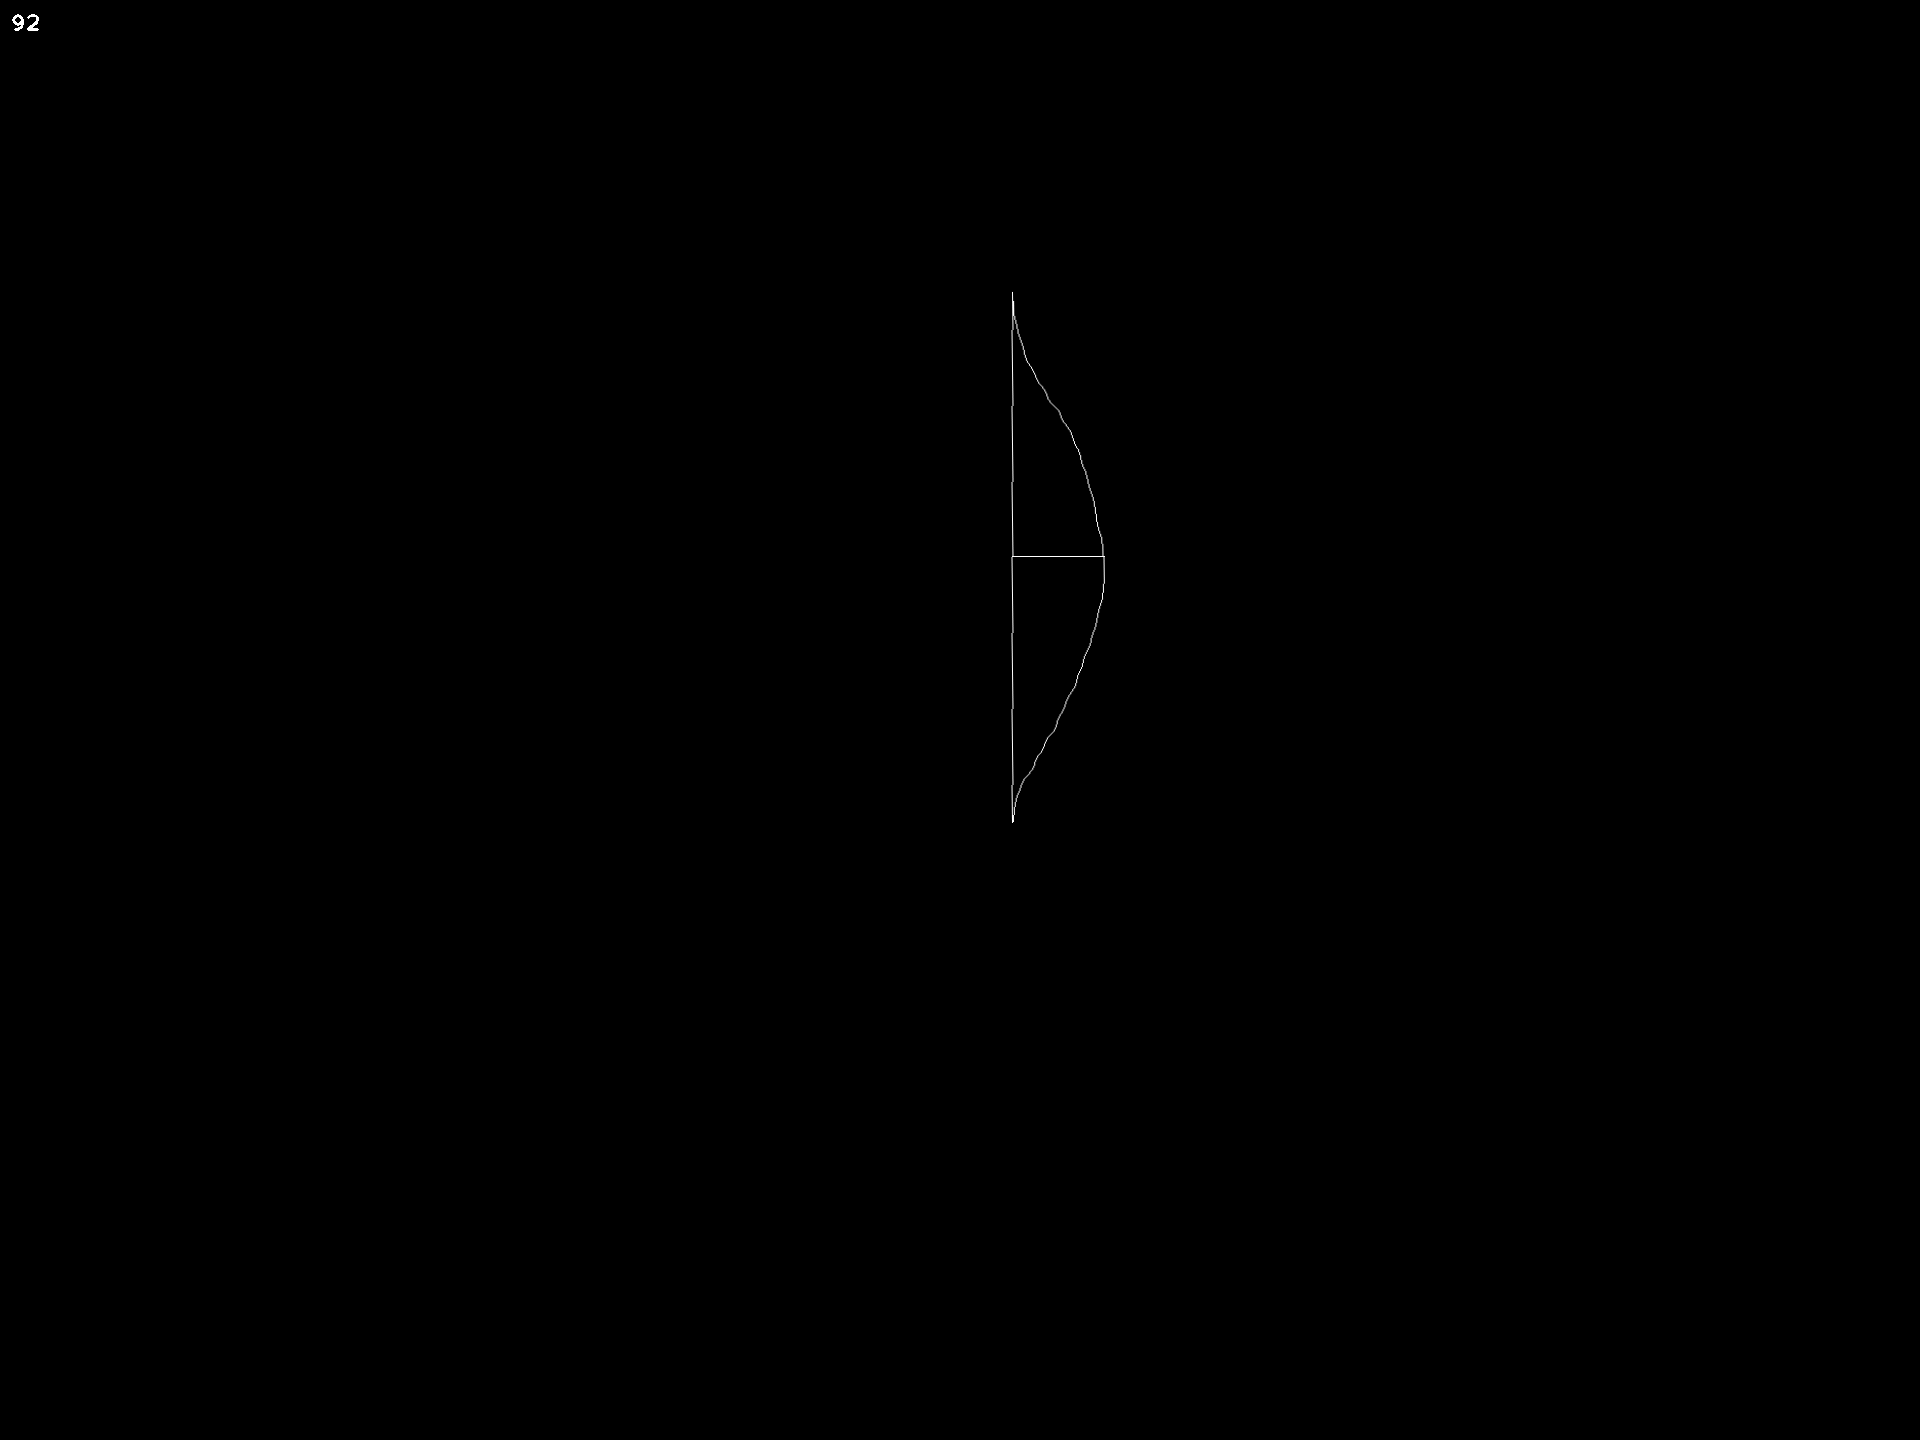

In [21]:
dis_x_max = dis_pts.max(axis=0)[1]         #白線を形成する点群の中でX座標値が最も大きい点(１番右に位置する点)のX座標①を抽出
dis_x_min = dis_pts.min(axis=0)[1]         #白線を形成する点群の中でX座標値が最も小さい点(１番左に位置する点)のX座標②を抽出
dis_max = abs(dis_x_max - line_pt1[0])     #接線の端の点(回転軸)のX座標と①の距離を計算
dis_min = abs(dis_x_min - line_pt1[0])     #接線の端の点(回転軸)のX座標と②の距離を計算
print(dis_max)
print(dis_min)
print(dis_x_max)
if dis_max >= dis_min:
  dis_x = dis_x_max                                    
  ans_pts = list(zip(*np.where(dis_pts == dis_x)))
  distance = dis_max

else:
  dis_x = dis_x_min
  ans_pts = list(zip(*np.where(dis_pts == dis_x)))
  distance = dis_min
print(distance)                                          #ピクセル単位での曲がり距離
print(ans_pts)
print(ans_pts[0][0])
dis_pt = dis_pts[ans_pts[0][0]]
dis_output = cv2.line(affine_output, (line_pt1[0], dis_pt[0]), (dis_pt[1], dis_pt[0]), 255, thickness=1)
cv2.putText(dis_output, str(distance),(10, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, 255, 2)
cv2_imshow(dis_output)

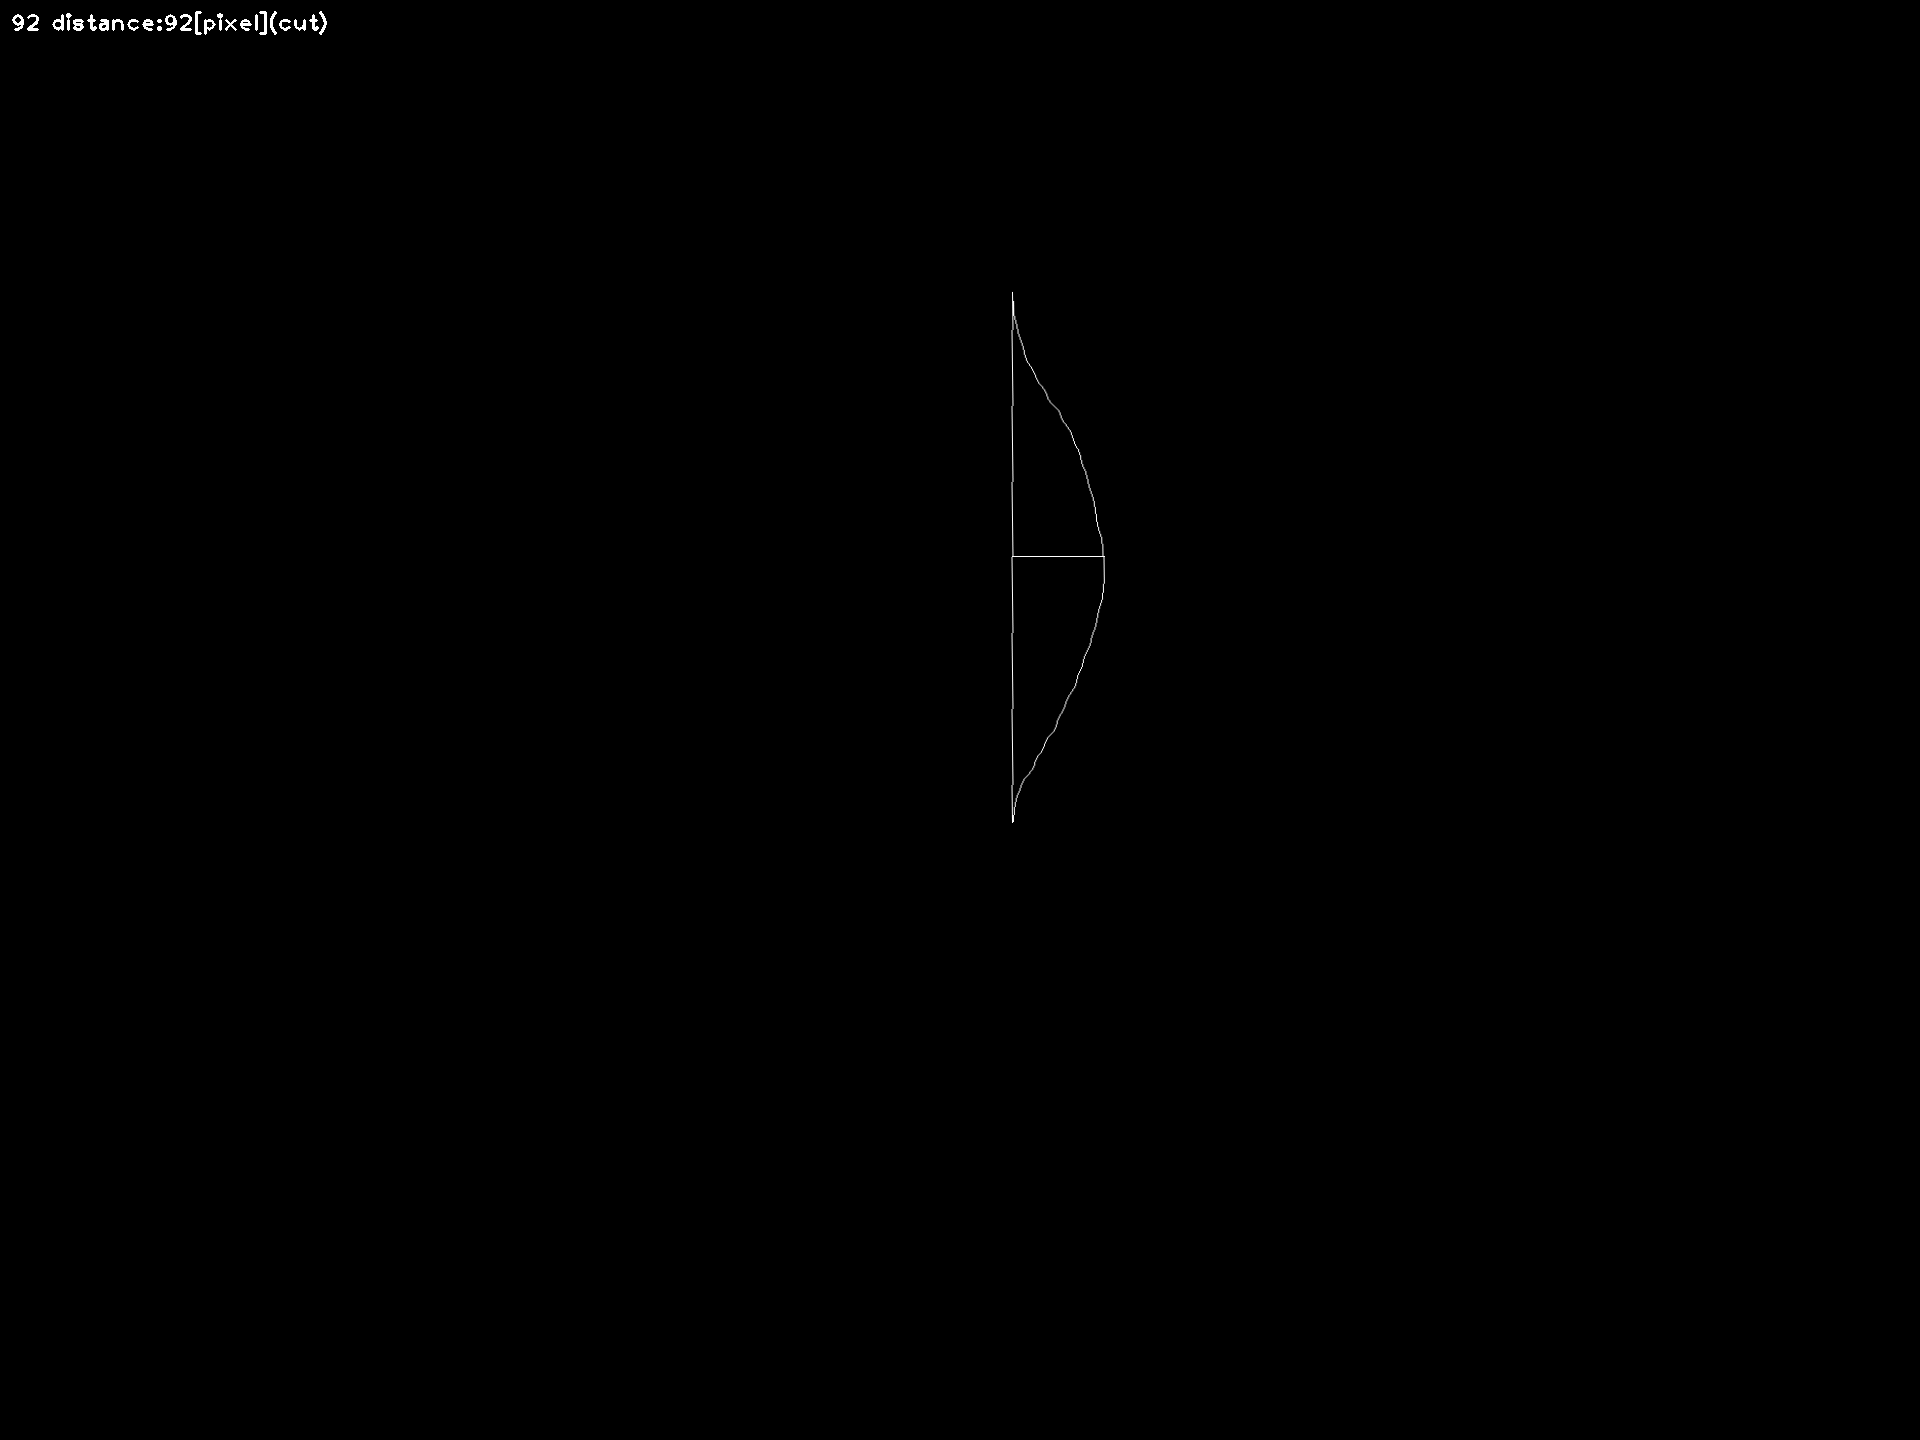

In [22]:
if distance <= 26.11:
    cv2.putText(dis_output, "distance:"+str(distance)+"[pixel](excellent)",(50, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, 255, 2)
elif distance > 26.11 and distance <= 52.22:
    cv2.putText(dis_output, "distance:"+str(distance)+"[pixel](good)",(50, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, 255, 2)
else:
    cv2.putText(dis_output, "distance:"+str(distance)+"[pixel](cut)",(50, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, 255, 2)
cv2_imshow(dis_output)